<a href="https://colab.research.google.com/github/yusmanfadilah/python_project/blob/main/Copy_of_prem_league_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unveiling Football Insights Through Data Visualization: A Python Analysis of the Premier League Dataset**

In sports analytics, data has revolutionized how we comprehend and analyze performance. This article explores football through a Data Visualization of the Premier League dataset, aiming to reveal captivating insights and fun facts inside the data.

To start our data exploration, we first import the necessary libraries and access the dataset. This code below accomplishes initial step:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
pl = pd.read_csv('/content/drive/My Drive/premier_league.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pl.head(10)

,season,team,win,draw,lose,goals_for,goals_against,goal_difference,point,position
0,1992/1993,Manchester Utd,24,12,6,67,31,36,84,1
1,1992/1993,Aston Villa,21,11,10,57,40,17,74,2
2,1992/1993,Norwich City,21,9,12,61,65,-4,72,3
3,1992/1993,Blackburn,20,11,11,68,46,22,71,4
4,1992/1993,QPR,17,12,13,63,55,8,63,5
5,1992/1993,Liverpool,16,11,15,62,55,7,59,6
6,1992/1993,Sheffield Weds,15,14,13,55,51,4,59,7
7,1992/1993,Tottenham,16,11,15,60,66,-6,59,8
8,1992/1993,Manchester City,15,12,15,56,51,5,57,9
9,1992/1993,Arsenal,15,11,16,40,38,2,56,10


In [ ]:
pl.dtypes

season             object
team               object
win                 int64
draw                int64
lose                int64
goals_for           int64
goals_against       int64
goal_difference     int64
point               int64
position            int64
dtype: object

Now, let's take a deeper dive into the world of data and work together to answer these questions.

*Question #1
How does the end position of teams change from season to season?*

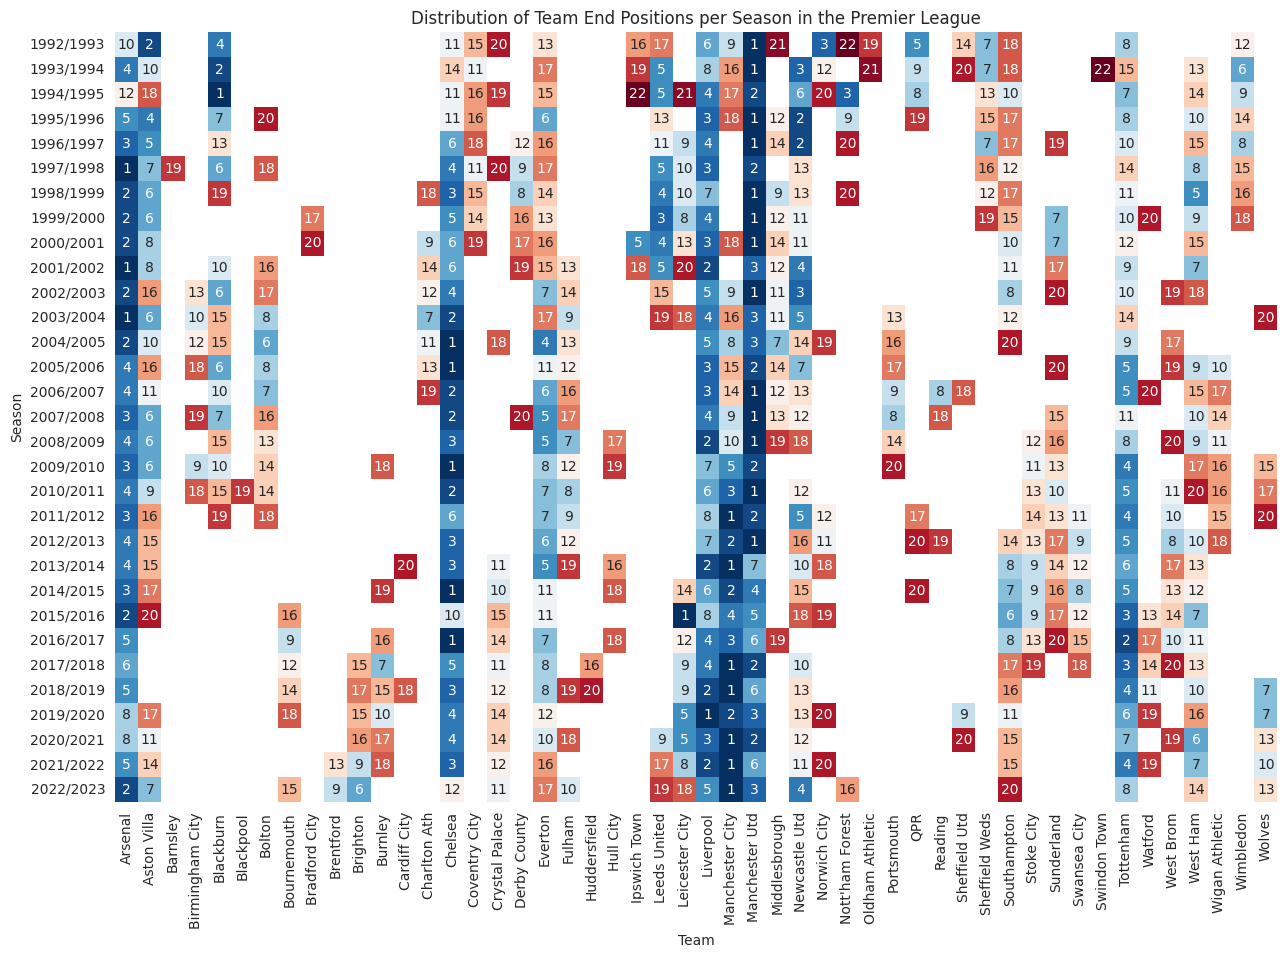

In [ ]:
# Set the style to white
sns.set_style("white")

# Calculating the frequency of end positions per season
pos_per_season = pl.groupby(['season', 'team'])['position'].first().unstack()

# Visualizing the distribution of end positions per season
plt.figure(figsize=(15, 10))
sns.heatmap(pos_per_season, cmap='RdBu_r', annot=True, fmt='g', linewidths=0, cbar=False)
plt.title('Distribution of Team End Positions per Season in the Premier League')
plt.xlabel('Team')
plt.ylabel('Season')
plt.show()


# Some empty data columns indicate that in that particular year, the team faced relegation and therefore their position cannot be displayed.

*Question #2
Illustrate the performance trends over several seasons for non-relegated teams, using the graph given above.*

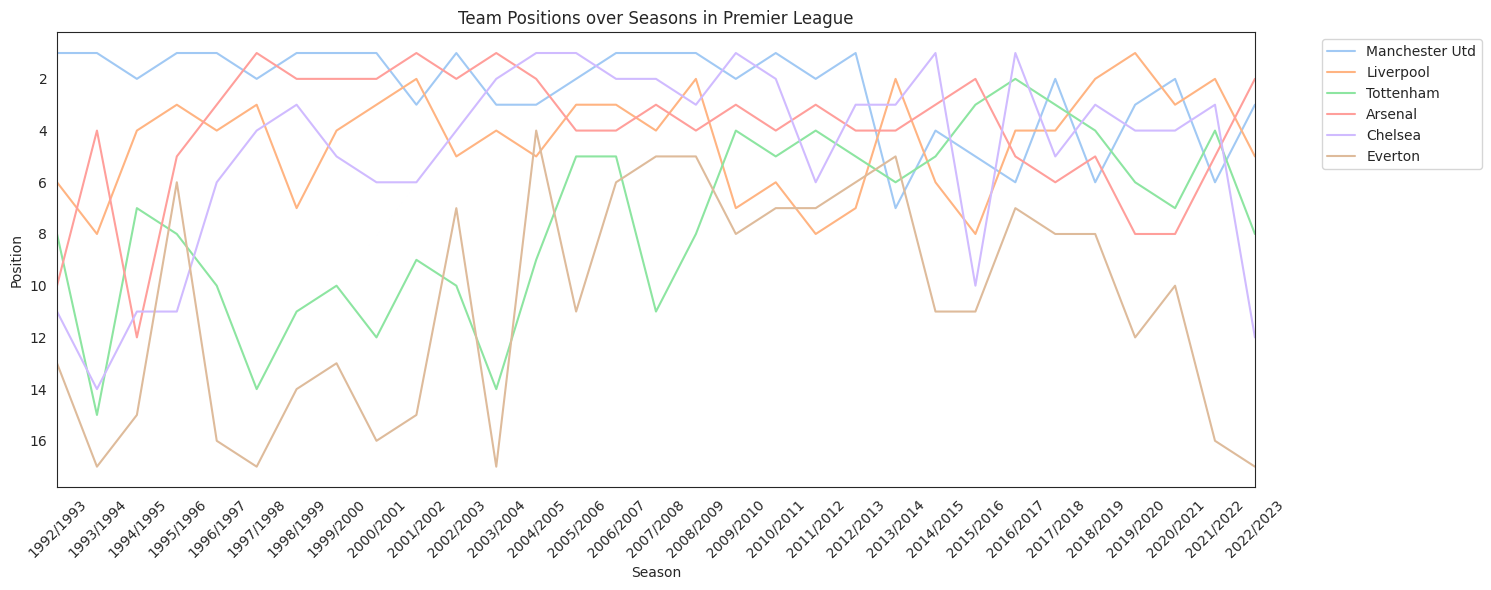

In [ ]:
selected_teams = ['Arsenal', 'Chelsea', 'Everton', 'Liverpool', 'Manchester Utd', 'Tottenham']

# Wider graph for scalability
plt.figure(figsize=(15, 6))

sns.lineplot(data=pl[pl['team'].isin(selected_teams)], x='season', y='position', hue='team')
plt.xlabel('Season')
plt.ylabel('Position')
plt.title('Team Positions over Seasons in Premier League')
plt.xticks(rotation=45)

# Invert y-axis to display higher position values at the top
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis range for better visualisation
plt.xlim(pl['season'].min(), pl['season'].max())

# Optimize plot layout
plt.tight_layout()

plt.show()


*Question #3
Can we identify at least 10 teams based on their total number of wins?*

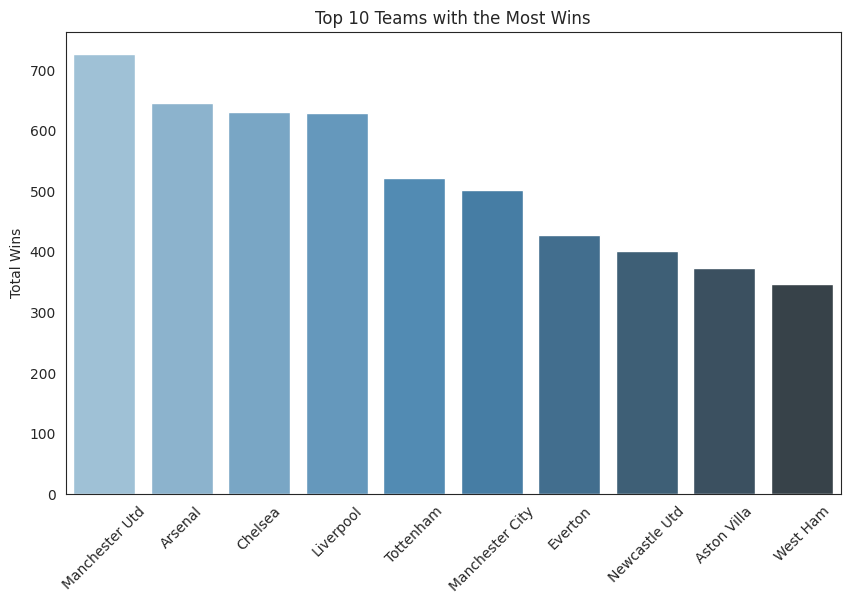

              Team  Total Wins
0   Manchester Utd         726
1          Arsenal         645
2          Chelsea         629
3        Liverpool         628
4        Tottenham         520
5  Manchester City         501
6          Everton         426
7    Newcastle Utd         401
8      Aston Villa         372
9         West Ham         346


In [ ]:
# Calculating total wins per team and selecting the top 10 teams
top_teams = pl.groupby('team')['win'].sum().nlargest(10)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.index, y=top_teams.values, palette='Blues_d')
plt.ylabel('Total Wins')
plt.title('Top 10 Teams with the Most Wins')

# Edit and removing x-axis label for scalability
plt.xticks(rotation=45)
plt.gca().xaxis.set_label_text('')  # This line removes the x-axis label

plt.show()


# Create a DataFrame from the average wins data
team_stats = pd.DataFrame({
    'Team': top_teams.index,
    'Total Wins': top_teams.values
})

# Display the DataFrame as a table
print(team_stats)


*Question #4
How significant is the correlation between total points and goal difference?*

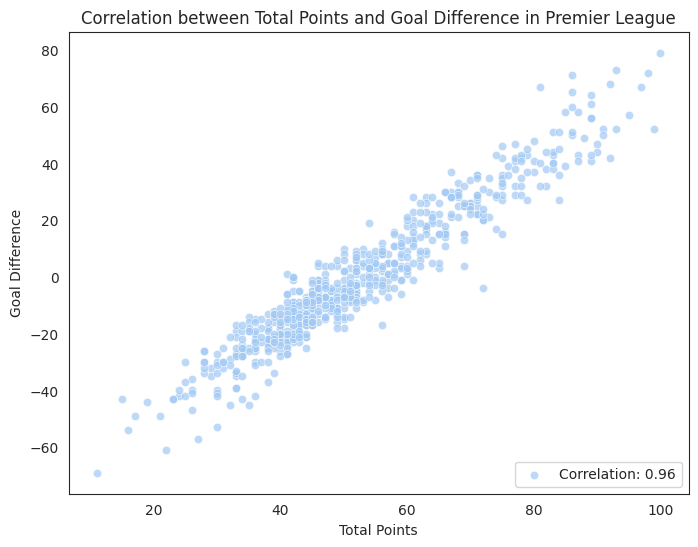

In [ ]:
# Calculate correlation
correlation = pl['point'].corr(pl['goal_difference'])

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pl, x='point', y='goal_difference', alpha=0.7)
plt.title('Correlation between Total Points and Goal Difference in Premier League')
plt.xlabel('Total Points')
plt.ylabel('Goal Difference')

# Create correlation text on the lower right
correlation_text = f"Correlation: {correlation:.2f}"
plt.legend([correlation_text], loc='lower right', fontsize=10)
# Show the graph
plt.show()


In this case, **a correlation coefficient of 0.96 is very close to +1, indicating an extremely strong positive linear relationship between the total points earned by teams and their goal differences**. This means that teams with higher goal differences tend to earn higher total points, and vice versa. This strong positive correlation aligns with the intuitive understanding that teams with a higher goal difference (more goals scored than conceded) often win matches and accumulate more points, leading to a higher position in the league.

*Question #5
What is the average goal difference for each finishing position?*

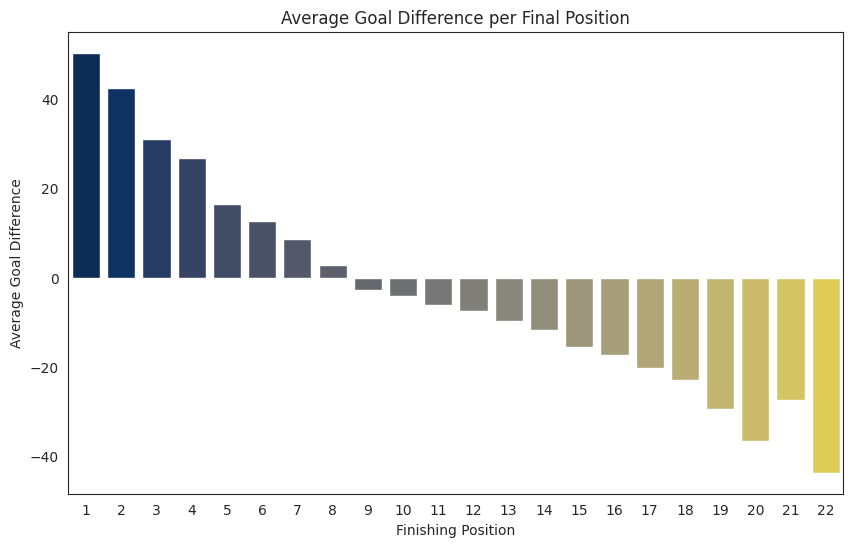

In [ ]:
# Grouping the data based on Finishing Position and calculating the average Goal Difference
avg_goal_per_pos = pl.groupby('position')['goal_difference'].mean().reset_index()

# Visualizing the Average Goal Difference per Finishing Position
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_goal_per_pos, x='position', y='goal_difference', palette='cividis')
plt.title('Average Goal Difference per Final Position')
plt.xlabel('Finishing Position')
plt.ylabel('Average Goal Difference')
plt.show()


The data is first grouped by finishing position, and then the average goal difference is calculated for each position. The sns.barplot function is used to create a bar plot where the x-axis represents the finishing positions, the y-axis represents the average goal difference, and the color palette 'cividis' is applied for a visually appealing representation. The plot is given a title, and the x and y axes are labeled accordingly. Finally, the plot is displayed using the plt.show() function, **affirming that positions 1 to 8 exhibit a positive goal difference, whereas positions beyond 8 indicate a negative goal difference.**

*Question #6
What are the top 5 average finished position teams?*

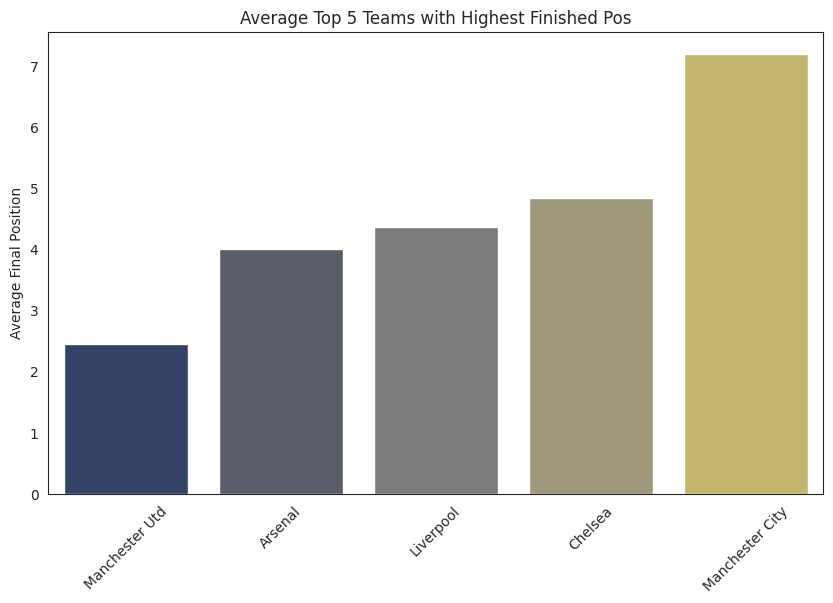

In [ ]:
# Calculating average wins per team
avg_pos = pl.groupby('team')['position'].mean().nsmallest(5)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pos.index, y=avg_pos.values, palette='cividis')
plt.ylabel('Average Final Position')
plt.title('Average Top 5 Teams with Highest Finished Pos')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.gca().xaxis.set_label_text('')

plt.show()


In conclusion, these averages are calculated across multiple seasons, providing insights into team performance over time. Teams with lower average positions generally exhibit better overall performance, while those with higher averages tend to land in the middle or lower tiers of the league. **As an example, Manchester United holds an average final position of 2.45, while Manchester City, on the other hand, maintains an average final position of approximately 7.19.**